In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv("../data/ssbci_data_withclusters.csv")
df.loc[df['jobs_created'] > 0, 'creation_status'] = 1
df.loc[df['jobs_created'] == 0, 'creation_status'] = 0
df_expanded = df.copy()
df = df[['ssbci_original_funds', 'jobs_retained','revenue','full_time_employees','loan_investment_amount', 'SPY_Close','creation_status']]
df_expanded = df_expanded[['ssbci_original_funds', 'jobs_retained','revenue','full_time_employees','loan_investment_amount', 
                           'SPY_Close', 'kproto','creation_status']]

#df_expanded.drop(['Unnamed: 0','borrower_insurance_premium','lender_insurance_premium','jobs_created','job_benefit'], axis=1, inplace=True)
df.columns

Index(['ssbci_original_funds', 'jobs_retained', 'revenue',
       'full_time_employees', 'loan_investment_amount', 'SPY_Close',
       'creation_status'],
      dtype='object')

In [65]:
ssbci_obj_cols = df_expanded.select_dtypes(exclude=[np.float64]).columns
#ssbci_int_cols = [['naics_code','year_incorporated']]
#ssbci_obj_cols.append(ssbci_int_cols)
ssbci_obj_cols

Index(['kproto'], dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in ssbci_obj_cols:
    df_expanded[i] = label_encoder.fit_transform(df_expanded[i])

print("Label Encoded Data: ")
df_expanded.head()

Label Encoded Data: 


,ssbci_original_funds,jobs_retained,revenue,full_time_employees,loan_investment_amount,SPY_Close,kproto,creation_status
0,90000.0,1.0,0.0,5.0,180000.0,152.110001,6,1.0
1,250000.0,0.0,0.0,28.0,2400000.0,167.509995,2,1.0
2,110000.0,5.0,0.0,7.0,265000.0,183.820007,6,1.0
3,99750.0,0.0,0.0,2.0,199500.0,181.509995,6,1.0
4,62500.0,0.0,1494916.0,8.0,125000.0,187.399994,6,1.0


In [67]:
X = df.copy()
X.drop("creation_status", inplace = True, axis = 1)
Y = df.creation_status

In [68]:
#X_train, X_test = X[:int(X.shape[0]*0.8)].values, X[int(X.shape[0]*0.8):].values
#Y_train, Y_test = Y[:int(X.shape[0]*0.8)].values, Y[int(X.shape[0]*0.8):].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score


boost = GradientBoostingClassifier(max_depth=10)
boost.fit(X_train, Y_train)
y_pred_boost = boost.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(Y_test, y_pred_boost))
print('Accuracy score')
ac = accuracy_score(Y_test, y_pred_boost)
print(ac)
print('Precision score')
pr = precision_score(Y_test, y_pred_boost)
print(pr)
print('Recall score')
re = recall_score(Y_test, y_pred_boost)
print(re)
print('F1 score')
f1 = f1_score(Y_test, y_pred_boost)
print(f1)

Confusion matrix
[[1963  571]
 [ 507 1352]]
Accuracy score
0.7546096061916686
Precision score
0.703068122724909
Recall score
0.7272727272727273
F1 score
0.7149656266525648


In [70]:
Xe = df_expanded.copy()
Xe.drop("creation_status", inplace = True, axis = 1)
Ye = df_expanded.creation_status

In [71]:
Xe_train, Xe_test, Ye_train, Ye_test = train_test_split(Xe, Ye,
test_size=0.2, random_state=42)

In [72]:
boost_expanded = GradientBoostingClassifier(max_depth=10)
boost_expanded.fit(Xe_train, Ye_train)
ye_pred_boost = boost_expanded.predict(Xe_test)
print('Confusion matrix')
print(confusion_matrix(Ye_test, ye_pred_boost))
print('Accuracy score')
ace = accuracy_score(Ye_test, ye_pred_boost)
print(ace)
print('Precision score')
pre = precision_score(Ye_test, ye_pred_boost)
print(pre)
print('Recall score')
ree = recall_score(Ye_test, ye_pred_boost)
print(ree)
print('F1 score')
f1e = f1_score(Ye_test, ye_pred_boost)
print(f1e)

Confusion matrix
[[2020  514]
 [ 480 1379]]
Accuracy score
0.7737309355793307
Precision score
0.728473322768093
Recall score
0.741796664873588
F1 score
0.7350746268656716


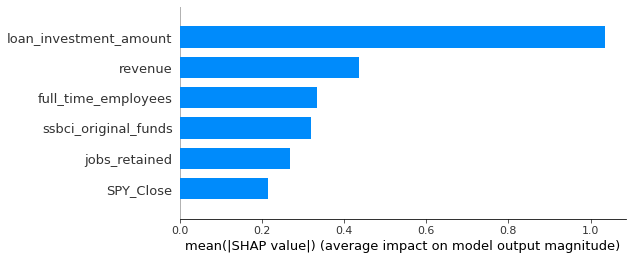

In [73]:
import shap

explainer_km = shap.TreeExplainer(boost)
shap_values_km = explainer_km.shap_values(X)
shap.summary_plot(shap_values_km, X, plot_type="bar")

In [74]:
explainer_km = shap.TreeExplainer(boost_epxanded)
shap_values_km = explainer_km.shap_values(Xe)
shap.summary_plot(shap_values_km, Xe, plot_type="bar")

NameError: name 'boost_epxanded' is not defined

In [52]:
import pickle
pickle.dump(model, open("model.dat", "wb"))

model.save_model("model.json")

In [43]:
import joblib
joblib.dump(boost, 'model.pkl')
print("Model dumped!")

Model dumped!


In [44]:
# Load the model that you just saved
model = joblib.load('model.pkl')

# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")


Models columns dumped!
